SMOTE

In [1]:
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

#FEATURE EGNGG
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#MODEL SELECTION
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#MODEL
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#MODEL SCORES
from sklearn.metrics import confusion_matrix , accuracy_score ,classification_report

#FEATURE IMPORTANCE
from sklearn.inspection import permutation_importance

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Data/TelcoChurn-1.csv') 

In [5]:
data

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,International plan_No,International plan_Yes,Voice mail plan_No,Voice mail plan_Yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,11.01,10.0,3,2.70,1,0,1,0,0,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,11.45,13.7,3,3.70,1,0,1,0,0,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,7.32,12.2,5,3.29,0,0,1,0,1,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,8.86,6.6,7,1.78,2,0,0,1,1,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,8.41,10.1,3,2.73,3,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,79,415,0,134.7,98,22.90,189.7,68,16.12,221.4,...,9.96,11.8,5,3.19,2,0,1,0,1,0
2662,192,415,36,156.2,77,26.55,215.5,126,18.32,279.1,...,12.56,9.9,6,2.67,2,0,1,0,0,1
2663,68,415,0,231.1,57,39.29,153.4,55,13.04,191.3,...,8.61,9.6,4,2.59,3,0,1,0,1,0
2664,28,510,0,180.8,109,30.74,288.8,58,24.55,191.9,...,8.64,14.1,6,3.81,2,0,1,0,1,0


In [8]:
min_val = data[:].min() 
max_val = data[:].max() 

In [9]:
min_val

Account length              1.00
Area code                 408.00
Number vmail messages       0.00
Total day minutes           0.00
Total day calls             0.00
Total day charge            0.00
Total eve minutes           0.00
Total eve calls             0.00
Total eve charge            0.00
Total night minutes        43.70
Total night calls          33.00
Total night charge          1.97
Total intl minutes          0.00
Total intl calls            0.00
Total intl charge           0.00
Customer service calls      0.00
Churn                       0.00
International plan_No       0.00
International plan_Yes      0.00
Voice mail plan_No          0.00
Voice mail plan_Yes         0.00
dtype: float64

In [10]:
max_val

Account length            243.00
Area code                 510.00
Number vmail messages      50.00
Total day minutes         350.80
Total day calls           160.00
Total day charge           59.64
Total eve minutes         363.70
Total eve calls           170.00
Total eve charge           30.91
Total night minutes       395.00
Total night calls         166.00
Total night charge         17.77
Total intl minutes         20.00
Total intl calls           20.00
Total intl charge           5.40
Customer service calls      9.00
Churn                       1.00
International plan_No       1.00
International plan_Yes      1.00
Voice mail plan_No          1.00
Voice mail plan_Yes         1.00
dtype: float64

In [15]:
data = data.drop(['Account length', 'Area code'], axis = 1)

In [16]:
data

,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,International plan_No,International plan_Yes,Voice mail plan_No,Voice mail plan_Yes
0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1,0,0,1
1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,1,0,0,1
2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,1,0,1,0
3,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0,1,1,0
4,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,0,1,0,1,0
2662,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0,1,0,0,1
2663,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0,1,0,1,0
2664,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0,1,0,1,0


In [17]:
x = data.drop('Churn' ,axis =1)
y = data['Churn']

In [18]:
x

,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,International plan_No,International plan_Yes,Voice mail plan_No,Voice mail plan_Yes
0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,1,0,0,1
1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,1,0,0,1
2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,1,0,1,0
3,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,1,1,0
4,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,1,0,1,0
2662,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,1,0,0,1
2663,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,1,0,1,0
2664,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,1,0,1,0


In [19]:
y

0       0
1       0
2       0
3       0
4       0
       ..
2661    0
2662    0
2663    0
2664    0
2665    0
Name: Churn, Length: 2666, dtype: int64

In [20]:
data['Churn'].value_counts()

0    2278
1     388
Name: Churn, dtype: int64

In [21]:
data['Churn'].value_counts(normalize=True)

0    0.854464
1    0.145536
Name: Churn, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


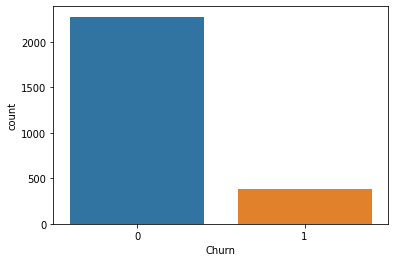

In [22]:
sns.countplot(data['Churn'])

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [24]:
lr = LogisticRegression()
  

lr.fit(x_train, y_train.ravel())
  
y_pred = lr.predict(x_test) 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       692
           1       0.48      0.15      0.23       108

    accuracy                           0.86       800
   macro avg       0.68      0.56      0.58       800
weighted avg       0.83      0.86      0.83       800



In [26]:
smote = SMOTE(sampling_strategy='minority') 
x ,y = smote.fit_resample(x ,y) 
print(x.shape ,y.shape)

(4556, 18) (4556,)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class after application of SMOTE')

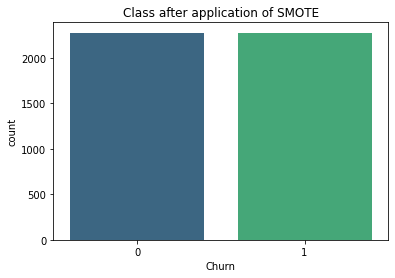

In [27]:
y.value_counts()
sns.countplot(y ,palette='viridis')
plt.title('Class after application of SMOTE')

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [29]:
print("Number of transactions in x_train dataset: ", x_train.shape)
print("Number of transactions in y_train dataset: ", y_train.shape)
print("Number of transactions in x_test dataset: ", x_test.shape)
print("Number of transactions in y_test dataset: ", y_test.shape)

Number of transactions in x_train dataset:  (3189, 18)
Number of transactions in y_train dataset:  (3189,)
Number of transactions in x_test dataset:  (1367, 18)
Number of transactions in y_test dataset:  (1367,)


In [30]:
rows, columns=np.multiply(x.shape, .7)
rows

3189.2

In [31]:
lr = LogisticRegression()
  
lr.fit(x_train, y_train.ravel())
  
y_pred = lr.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [32]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True` above.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_pred, labels=[1,0]))

[[522 159]
 [187 499]]


In [33]:
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[522 159]
 [187 499]]


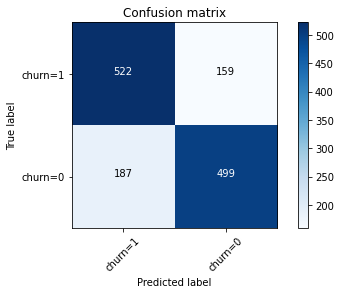

In [34]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       686
           1       0.74      0.77      0.75       681

    accuracy                           0.75      1367
   macro avg       0.75      0.75      0.75      1367
weighted avg       0.75      0.75      0.75      1367

